<a href="https://colab.research.google.com/github/LamuneGitHub/A001_Python_Test/blob/main/python_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA
## 와인 데이터 생성

In [4]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# csv 파일로 부터 DataFrame 읽기
df_red = pd.read_csv( "https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv" , sep = ",")
df_white = pd.read_csv( "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv" , sep = ";")

#읽은 데이터 확인
##print ( df_red.shape )
##print ( df_white.shape )
#df_red.info()
#df_red.describe()

# 중복된 갯수 확인
df_red.duplicated().sum()

# 중복 제거
df_red = df_red.drop_duplicates()
df_white = df_white.drop_duplicates()

# index 재 생성
df_red.reset_index( inplace = True , drop=True)

#와인 색상 컬럼 생성
red_color = np.repeat('red', len(df_red))
white_color = np.repeat('white', len(df_white))
df_red['color'] = red_color
df_white['color'] = white_color

#레드 와인과 화이트 와인 DataFrame을 합치기 전에 컬럼이 동일한지 여부 확인
print( set( df_red ) == set(df_white))

#DataFrame 합치기
wine_df = df_red.append(df_white )

#합치기 결과 확인
#wine_df.shape

#합쳐진 DataFrame을 csv파일로 저장
#wine_df.to_csv('winequality_edited.csv' ,index=False ,ignore_index = True)

#
#np.repeat('red', len(df_red))

True


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Feature Engineering
## 전처리 생성한 와인 데이터를 이용하여 유용한 데이터 생성


In [1]:
#wine_df = pd.read_csv( "winequality_edited.csv" , sep = ",")
#df_Wine_tmp

#집계함수 처리
# 품질에 따른 집계(평균)
wine_df.groupby('quality').mean()

# 와인 색에 따른 집계(평균)
wine_df.groupby('color').mean()

# quality 컬럼 하나만을 선택하여 확인
wine_df.groupby('color')['quality'].mean()

# 범위에 따라 단계 분류
# 'wine_df.pH.describe()'를 통해 확인한, 4분위수를 활용하여 bins로 입력
bins = [2.72, 3.11, 3.21, 3.33, 4.01]
labels = ['Low', 'Medium', 'Moderately High', 'High']
wine_df['ph_levels'] = pd.cut(x=wine_df['pH'], bins=bins, labels=labels)

# 와인색별 잔류 설탕 평균
wine_df.groupby('color')['residual sugar'].mean()


NameError: ignored

# 시각화

## 막대 그래프


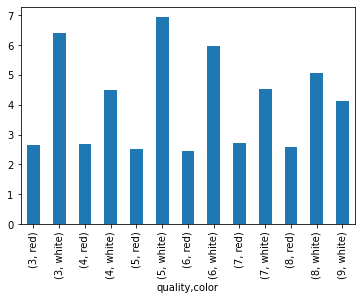

In [65]:

# 그래프로 보기(막대 그래프)
group_residual_sugar = wine_df.groupby(['quality', 'color'])['residual sugar'].mean()
group_residual_sugar.plot(kind='bar');



## 꺽은선 그래프

quality
3    0.517000
4    0.462379
5    0.393970
6    0.315626
7    0.292342
8    0.302973
9    0.298000
Name: volatile acidity, dtype: float64


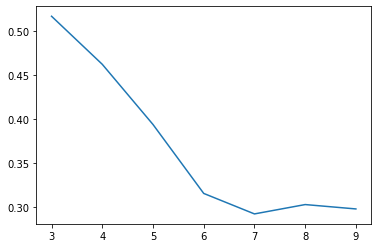

In [67]:
# quality 에 따른 평균 휘발성산 확인
group_volatile_acidity = wine_df['volatile acidity'].groupby(wine_df['quality'])
print(group_volatile_acidity.mean())

# plot으로 시각화
plt.plot(group_volatile_acidity.mean());

## 점도표


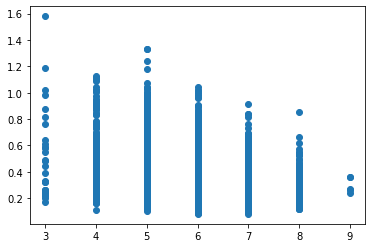

In [69]:
# quality 에 따른 휘발성산의 차이를 scatter plot 으로 확인
plt.scatter(wine_df['quality'], wine_df['volatile acidity']);

# Data 전처리


# 특성파악


#foreign Key 열 이름을 조회

In [ ]:
#foreign Key 열 이름을 조회
all_columns = pd.Series(list(patients) + list(insuline_test) + list(side_effects)) 
all_columns[all_columns.duplicated()]